In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import requests
import gmaps
import os
import json
import scipy.stats as st
from scipy.stats import linregress

from api_keys import g_key

In [2]:
wine_data = pd.read_csv("wine_data_with_year.csv")
weather_data = pd.read_csv("full_weather.csv")

/Users/gabemacey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,3,5,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
winery = wine_data["region_1"].value_counts()
winery = winery.head(26)
winery

Napa Valley                4480
Columbia Valley (WA)       4124
Russian River Valley       3091
California                 2629
Paso Robles                2350
Willamette Valley          2301
Mendoza                    2301
Alsace                     2163
Champagne                  1613
Barolo                     1599
Finger Lakes               1565
Sonoma Coast               1474
Brunello di Montalcino     1470
Rioja                      1469
Sonoma County              1246
Toscana                    1197
Walla Walla Valley (WA)    1066
Chianti Classico           1062
Santa Barbara County       1000
Carneros                    999
Yakima Valley               997
Sta. Rita Hills             975
Dry Creek Valley            939
Sicilia                     925
Côtes de Provence           859
Santa Ynez Valley           812
Name: region_1, dtype: int64

In [ ]:
top25 = ['Napa Valley',
         'Columbia Valley',
         'Russian River Valley',
         'Paso Robles',
         'Willamette Valley',
         'Mendoza',
         'Alsace',
         'Champagne',
         'Barolo',
         'Finger Lakes',
         'Sonoma Coast',
         'Brunello di Montalcino',
         'Rioja',
         'Sonoma County',
         'Toscana',
         'Walla Walla Valley',
         'Chianti Classico',
         'Santa Barbara County',
         'Carneros',
         'Yakima Valley',
         'Sta. Rita Hills',
         'Dry Creek Valley',
         'Sicilia',
         'Côtes de Provence',
         'Santa Ynez Valley']

In [ ]:
# Target city
target_city = "Napa Valley"

# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, g_key)

In [ ]:

# Run a request to endpoint and convert result to json
geo_data = requests.get(target_url).json()

# Print the json
print(geo_data)

In [ ]:

# Print the json (pretty printed)
print(json.dumps(geo_data, indent=4, sort_keys=True))

In [ ]:

lat = []
long = []
city_name = []

In [ ]:
for city in top25:
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(city, g_key)
    response = requests.get(target_url).json()
    print("Processing", city)
    
    try:
        lat.append(response["results"][0]["geometry"]["location"]["lat"])
        long.append(response["results"][0]["geometry"]["location"]["lng"])
        city_name.append(city)
    except (RuntimeError, TypeError, NameError, KeyError, IndexError):
        print("No data to show here")

In [ ]:

# create a data frame from cities, lat, and temp
wine_dict = {
    "City": city_name,
    "Latitude": lat, 
    "Longitude": long}

map_wine_data = pd.DataFrame(wine_dict)
map_wine_data

In [ ]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key) 

# Store 'Lat' and 'Lng' into  locations 
locations = map_wine_data[["Latitude", "Longitude"]].astype(float)

In [ ]:

fig = gmaps.figure(zoom_level=2.1, center=(20,-30))

markers = gmaps.marker_layer(locations)
fig.add_layer(markers)

# Display figure
fig

In [ ]:
#Take a look at all the column names for the weather csv
weather_data.columns

In [ ]:
#Take a look at all the column names for the wine csv
wine_data.columns

In [4]:
#Dropped the NA's from wine csv
wine_data.dropna(inplace=True)

In [5]:
#Filter out the rows of data that we are not interested in. 
#We removed all cities that were not Napa Valley and all years that were not between 2010 and 2018
Napa_valley =  wine_data[wine_data['region_1'].str.contains('Napa','Mendoza')]
remove_years_not_needed = Napa_valley[Napa_valley['year']!= 1]

In [6]:
#Removed columns from wine data file that were not needed for our analysis 
napa_valley_wines = remove_years_not_needed.drop(columns=['Unnamed: 0','country','description',
                                                          'designation','price','province','region_1',
                                                          'region_2','taster_twitter_handle','taster_name'])

napa_valley_wines.describe()

,points,year
count,1150.000000,1150.000000
mean,89.753043,2012.729565
std,2.812979,1.221684
min,80.000000,2010.000000
25%,88.000000,2012.000000
50%,90.000000,2013.000000
75%,92.000000,2013.000000
max,99.000000,2016.000000


In [7]:
#Removed 2017 and 2018 data from weather because we noticed that where was no data for wine made in those years.
#removed unneeded columns from the weather data  
weather_data_df = pd.DataFrame(weather_data)

weather_data_df = weather_data_df[weather_data_df['year'] <= 2016]
weather = weather_data_df.drop(columns=['dt','Hour','timezone','feels_like',
                                        'temp_min','temp_max',
                                        'sea_level','grnd_level','pressure',
                                        'wind_deg','clouds_all','rain_3h','snow_1h', 
                                        'snow_3h','weather_id','weather_main',
                                        'weather_icon','weather_description'])

In [8]:
weather

,date,year,city_name,lat,lon,temp,humidity,wind_speed,rain_1h
0,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,52.86,79.0,8.05,NaN
1,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,52.75,79.0,8.05,NaN
2,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,52.50,79.0,6.93,NaN
3,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,51.69,82.0,5.82,NaN
4,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,51.33,86.0,4.70,NaN
5,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,51.51,86.0,5.82,NaN
6,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,50.49,92.0,3.27,NaN
7,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,49.87,92.0,3.36,NaN
8,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,49.73,92.0,3.36,NaN
9,1/1/2010,2010.0,Napa Valley,38.427431,-122.394330,49.55,89.0,5.82,NaN


In [9]:
weather.describe()

,year,lat,lon,temp,humidity,wind_speed,rain_1h
count,123904.000000,123904.000000,123904.000000,123904.000000,123904.000000,123904.000000,5421.000000
mean,2013.004625,2.947909,-95.757898,60.591944,63.201333,6.262441,1.051306
std,2.004036,35.658223,26.770592,13.536643,24.444983,4.147384,1.173403
min,2010.000000,-32.889625,-122.394330,23.430000,1.000000,0.020000,0.100000
25%,2011.000000,-32.889625,-122.394330,50.970000,43.000000,3.360000,0.320000
50%,2013.000000,38.427431,-122.394330,59.020000,64.000000,4.700000,0.570000
75%,2015.000000,38.427431,-68.852687,69.940000,86.000000,8.050000,1.420000
max,2016.000000,38.427431,-68.852687,108.090000,100.000000,46.080000,10.360000


In [10]:
#Merged the two csv files by year
weather_wine_data = pd.merge(napa_valley_wines,weather,how='outer',on=['year', 'city_name'])
weather_wine_data.columns

Index(['points', 'title', 'year', 'variety', 'winery', 'city_name', 'date',
       'lat', 'lon', 'temp', 'humidity', 'wind_speed', 'rain_1h'],
      dtype='object')

In [11]:
#Since we need rain data set it to 0 -KD
weather_wine_data['rain_1h'].fillna(0,inplace=True)

In [12]:
#Below is the merged data file 
weather_wine_data

,points,title,year,variety,winery,city_name,date,lat,lon,temp,humidity,wind_speed,rain_1h
0,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,45.70,60.0,3.36,0.00
1,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,45.07,65.0,6.93,0.00
2,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,44.15,65.0,13.87,0.00
3,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,43.47,62.0,11.41,0.00
4,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,43.59,62.0,10.29,0.00
5,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,42.80,67.0,14.99,1.05
6,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,42.60,70.0,16.11,0.00
7,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,42.73,67.0,16.11,0.00
8,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,42.71,72.0,13.87,0.50
9,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.394330,42.08,93.0,5.82,1.13


In [13]:
weather_wine_data.dropna(inplace=True)

In [ ]:
weather_wine_data

In [14]:
#Renamed the columns to make the file look cleaner
weather_wine_data.rename(columns={'date' : 'Date',
                                  'year':'Year',
                                  'title':'Title',
                                  'points':'Points',
                                  'variety':'Variety',
                                  'winery':'Winery',
                                  'city_name':'City Name',
                                  'lat':'Lat',
                                  'lon':'Lon',
                                  'humidity':'Humidity',
                                  'wind_speed':'Wind Speed (mph)',
                                  'rain_1h': 'Rain (inches)'},inplace=True)
weather_wine_data.head()

,Points,Title,Year,Variety,Winery,City Name,Date,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches)
0,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,45.70,60.0,3.36,0.0
1,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,45.07,65.0,6.93,0.0
2,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,44.15,65.0,13.87,0.0
3,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,43.47,62.0,11.41,0.0
4,87.0,Kirkland Signature 2011 Mountain Cuvée Caberne...,2011,Cabernet Sauvignon,Kirkland Signature,Napa Valley,1/1/2011,38.427431,-122.39433,43.59,62.0,10.29,0.0


In [15]:
#grouped the data by Data,Title and Points and averaged the daily weather values that we are interested in analyzing 
mean_temp = weather_wine_data.groupby(['Date','Title']).mean()

In [16]:
mean_temp

Points  Year  \
Date     Title                                                              
1/1/2010 Benessere 2010 Phenomenon Estate Red (Napa Valley)    88.0  2010   
         Black Stallion 2010 Limited Release Cabernet Sa...    91.0  2010   
         C. Beck 2010 Barlow Vineyard Cabernet Sauvignon...    91.0  2010   
         Castello di Amorosa 2010 La Castellana Red (Nap...    92.0  2010   
         Duckhorn 2010 The Discussion Estate Grown Red (...    94.0  2010   
         Elyse 2010 York Creek Vineyard Petite Sirah (Na...    88.0  2010   
         Falcor 2010 Le Bijou Red (Napa Valley)                88.0  2010   
         Grgich Hills 2010 Estate Grown Merlot (Napa Val...    87.0  2010   
         Grgich Hills 2010 Miljenko's Vineyard Estate Gr...    90.0  2010   
         Grgich Hills 2010 Yountville Selection Estate G...    92.0  2010   
         HdV 2010 Hyde Vineyard Belle Cousine Red (Napa ...    88.0  2010   
         In Re 2010 You be the judge! Cabernet Sauvignon...    89.0  2010   
         Jack Nicklaus Wines 2010 Private Reserve Cabern...    90.0  2010   
         Jarvis 2010 Estate Grown Cave Fermented Caberne...    88.0  2010   
         Jarvis 2010 Estate Grown Cave Fermented Petit V...    92.0  2010   
         Jarvis 2010 Lake William Red (Napa Valley)            92.0  2010   
         Jeff Gordon 2010 Leo Cabernet Sauvignon (Napa V...    86.0  2010   
         Judd's Hill 2010 Founder's Art Reserve Cabernet...    91.0  2010   
         Krupp Brothers 2010 Stagecoach Vineyard Veraiso...    91.0  2010   
         Krutz 2010 Krupp Vineyard Malbec (Napa Valley)        92.0  2010   
         Krutz 2010 Stagecoach Vineyard Limited Edition ...    89.0  2010   
         La Diligence 2010 Stagecoach Vineyard Syrah (Na...    91.0  2010   
         Markham 2010 The Altruist Calistoga Estate Vine...    87.0  2010   
         Markham 2010 The Philanthropist Yountville Esta...    87.0  2010   
         Mira 2010 Hyde Vineyard Syrah (Napa Valley)           91.0  2010   
         Mumm Napa 2010 Blanc de Blancs Oak Barrel Aged ...    90.0  2010   
         Padis 2010 Sintilation Proprietary Red (Napa Va...    93.0  2010   
         Prager 2010 Royal Escort Paladini Vineyard Port...    87.0  2010   
         Rocca 2010 Vespera Red (Napa Valley)                  91.0  2010   
         Rombauer 2010 Diamond Selection Cabernet Sauvig...    84.0  2010   
...                                                             ...   ...   
9/9/2015 Robert Biale 2015 Stagecoach Vineyard Zinfandel...    90.0  2015   
         Robert Mondavi 2015 Reserve To Kalon Vineyard F...    92.0  2015   
         Rock Wall 2015 Hendry Vineyard Block 29 Zinfand...    90.0  2015   
         Rutherford Ranch 2015 Two Range Red (Napa Valley)     91.0  2015   
         Sheldon 2015 The Red Hat Old Vine Field Blend R...    93.0  2015   
         Stag's Leap Wine Cellars 2015 Karia Chardonnay ...    88.0  2015   
         V. Sattui 2015 Orsi Vineyard Semillon (Napa Val...    90.0  2015   
         V. Sattui 2015 Reserve Chardonnay (Napa Valley)       90.0  2015   
         VGS Chateau Potelle 2015 Eau de Tony Sauvignon ...    90.0  2015   
         Yao Family Wines 2015 Napa Crest Sauvignon Blan...    90.0  2015   
9/9/2016 Ballentine 2016 Betty's Vineyard Chenin Blanc (...    88.0  2016   
         Ballentine 2016 Maple Station Estate Grown Whit...    86.0  2016   
         Benessere 2016 Estate St. Helena Vineyard Rosat...    90.0  2016   
         Bennett Lane 2016 Maximus White Feasting Wine W...    90.0  2016   
         Brick & Mortar 2016 Vin Clair Pinot-Chardonnay ...    90.0  2016   
         Brick & Mortar 2016 Vin Rubis Pinot-Chardonnay ...    88.0  2016   
         Chappellet 2016 Signature Chenin Blanc (Napa Va...    92.0  2016   
         Clif Family 2016 Rte Blanc Sauvignon Blanc (Nap...    88.0  2016   
         Donkey & Goat 2016 Linda Vista Vineyard Chardon...    94.0  2016   
         Draxton 2016 Pinot Meunier Rosé (Napa Valley)   

In [17]:
temp = mean_temp.reset_index()

In [18]:
temp_df = pd.DataFrame(temp)

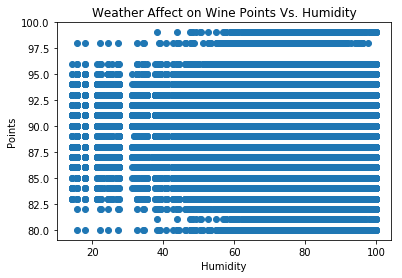

<Figure size 432x288 with 0 Axes>

In [19]:
humidity = temp_df['Humidity']
points = temp_df['Points']
plt.scatter(humidity,points)
plt.title('Weather Affect on Wine Points Vs. Humidity')
plt.ylabel('Points')
plt.xlabel('Humidity')
plt.show()

plt.savefig('Humid_Points.png')

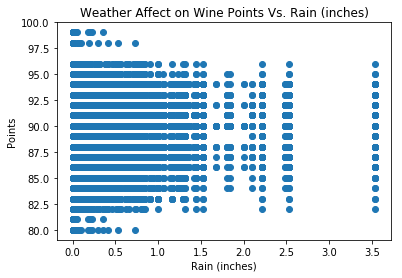

<Figure size 432x288 with 0 Axes>

In [20]:
rain = temp_df['Rain (inches)']
points = temp_df['Points']
plt.scatter(rain, points)
plt.title('Weather Affect on Wine Points Vs. Rain (inches)')
plt.ylabel('Points')
plt.xlabel('Rain (inches)')
plt.show()

plt.savefig('rain_date.png')

In [ ]:
wind = temp_df['Wind Speed (mph)']
points = temp_df['Points']
plt.scatter(wind,points)
plt.title('Weather Affect on Wine Points Vs. Wind Speed (mph)')
plt.ylabel('Points')
plt.xlabel('Wind Speed (mph)')
plt.show()

plt.savefig('Wind_Points.png')

In [ ]:
temp = temp_df['temp']
points = temp_df['Points']
plt.scatter(temp, points)
plt.title('Weather Affect on Wine Points Vs. Temp')
plt.ylabel('Points')
plt.xlabel('Temp')
plt.show()

plt.savefig('Temp_Points.png')

In [21]:
date_ordinal_df = weather_wine_data.groupby(['Date','Title']).mean()

In [22]:
date_ordinal_reset = date_ordinal_df.reset_index()

In [23]:
date_ordinal_data = pd.DataFrame(date_ordinal_reset)

In [24]:
date_ordinal_data

,Date,Title,Points,Year,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches)
0,1/1/2010,Benessere 2010 Phenomenon Estate Red (Napa Val...,88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
1,1/1/2010,Black Stallion 2010 Limited Release Cabernet S...,91.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
2,1/1/2010,C. Beck 2010 Barlow Vineyard Cabernet Sauvigno...,91.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
3,1/1/2010,Castello di Amorosa 2010 La Castellana Red (Na...,92.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
4,1/1/2010,Duckhorn 2010 The Discussion Estate Grown Red ...,94.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
5,1/1/2010,Elyse 2010 York Creek Vineyard Petite Sirah (N...,88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
6,1/1/2010,Falcor 2010 Le Bijou Red (Napa Valley),88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
7,1/1/2010,Grgich Hills 2010 Estate Grown Merlot (Napa Va...,87.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
8,1/1/2010,Grgich Hills 2010 Miljenko's Vineyard Estate G...,90.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
9,1/1/2010,Grgich Hills 2010 Yountville Selection Estate ...,92.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528


In [25]:
date_ordinal_data['Date'] = pd.to_datetime(date_ordinal_data['Date'])

In [26]:
date_ordinal_data

,Date,Title,Points,Year,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches)
0,2010-01-01,Benessere 2010 Phenomenon Estate Red (Napa Val...,88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
1,2010-01-01,Black Stallion 2010 Limited Release Cabernet S...,91.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
2,2010-01-01,C. Beck 2010 Barlow Vineyard Cabernet Sauvigno...,91.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
3,2010-01-01,Castello di Amorosa 2010 La Castellana Red (Na...,92.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
4,2010-01-01,Duckhorn 2010 The Discussion Estate Grown Red ...,94.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
5,2010-01-01,Elyse 2010 York Creek Vineyard Petite Sirah (N...,88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
6,2010-01-01,Falcor 2010 Le Bijou Red (Napa Valley),88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
7,2010-01-01,Grgich Hills 2010 Estate Grown Merlot (Napa Va...,87.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
8,2010-01-01,Grgich Hills 2010 Miljenko's Vineyard Estate G...,90.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528
9,2010-01-01,Grgich Hills 2010 Yountville Selection Estate ...,92.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528


In [27]:
date_ordinal_data['date_ordinal'] = pd.to_datetime(date_ordinal_data['Date']).apply(lambda date: date.toordinal())

In [28]:
date_ordinal_data

,Date,Title,Points,Year,Lat,Lon,temp,Humidity,Wind Speed (mph),Rain (inches),date_ordinal
0,2010-01-01,Benessere 2010 Phenomenon Estate Red (Napa Val...,88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
1,2010-01-01,Black Stallion 2010 Limited Release Cabernet S...,91.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
2,2010-01-01,C. Beck 2010 Barlow Vineyard Cabernet Sauvigno...,91.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
3,2010-01-01,Castello di Amorosa 2010 La Castellana Red (Na...,92.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
4,2010-01-01,Duckhorn 2010 The Discussion Estate Grown Red ...,94.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
5,2010-01-01,Elyse 2010 York Creek Vineyard Petite Sirah (N...,88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
6,2010-01-01,Falcor 2010 Le Bijou Red (Napa Valley),88.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
7,2010-01-01,Grgich Hills 2010 Estate Grown Merlot (Napa Va...,87.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
8,2010-01-01,Grgich Hills 2010 Miljenko's Vineyard Estate G...,90.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773
9,2010-01-01,Grgich Hills 2010 Yountville Selection Estate ...,92.0,2010,38.427431,-122.39433,51.296800,89.800000,4.71320,0.0528,733773


TypeError: invalid type promotion

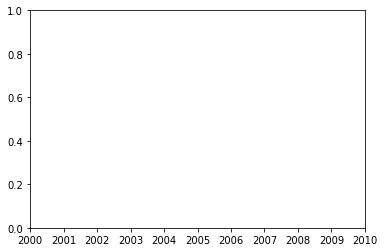

In [30]:
rain = date_ordinal_data['Rain (inches)']
date = date_ordinal_data['Date']
plt.scatter(date,rain)
plt.title('Weather Affect on Wine Points Vs. Rain (inches)')
plt.xlabel('Date')
plt.ylabel('Rain (inches)')
plt.show()

In [ ]:
date_regress = date_ordinal_data['date_ordinal']
rain_regress = date_ordinal_data['Rain (inches)']
correlation = st.pearsonr(date_regress,rain_regress)
(slope, intercept, rvalue, pvalue, stderr) = linregress(date_regress, rain_regress)
regress_values = date_regress * slope + intercept
line_eq = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.scatter(date_regress,rain_regress)
plt.plot(date_regress, regress_values, "r-")
plt.annotate(line_eq, (734000,1.75), fontsize=15,color='red')
plt.title('Weather Affect on Wine Points Vs. Rain')
plt.xlabel('Date_Ordinal')
plt.ylabel('Rain')
print(f'Correlation between the two variables is: {correlation[0].round(2)}')
plt.show()

plt.savefig('Regression.png')

In [ ]:
all_years = temp_df.groupby(['Points']).count()['Lat'].plot(kind='bar', title='All Years Points vs. Count')
plt.grid()

plt.savefig('All_points_bar.png')

In [ ]:
weather_wine_data

In [ ]:
year_2010 = temp_df[temp_df['Year'] == 2010]

In [ ]:
first_year = year_2010.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2010 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2010_points_count.png')

In [ ]:
year_2011 = temp_df[temp_df['Year'] == 2011]

In [ ]:
second_year = year_2011.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2011 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2011_points_count.png')

In [ ]:
year_2012 = temp_df[temp_df['Year'] == 2012]

In [ ]:
third_year = year_2012.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2012 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2012_points_count.png')

In [ ]:
year_2013 = temp_df[temp_df['Year'] == 2013]

In [ ]:
fourth_year = year_2013.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2013 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2013_points_count.png')

In [ ]:
year_2014 = temp_df[temp_df['Year'] == 2014]

In [ ]:
fifth_year = year_2014.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2014 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2014_points_count.png')

In [ ]:
year_2015 = temp_df[temp_df['Year'] == 2015]

In [ ]:
sixth_year = year_2015.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2015 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2015_points_count.png')

In [ ]:
year_2016 = temp_df[temp_df['Year'] == 2016]

In [ ]:
seventh_year = year_2016.groupby(['Points']).count()['Lat'].plot(kind='bar',xlim=(80,99),ylim=(0,25000),title='2016 Points vs. Count')
plt.ylabel('Count')
plt.savefig('2016_points_count.png')

In [ ]:
first_rain = temp_df.groupby(['Year']).sum()['Rain (inches)'].plot(kind='bar', title='Years by Sum of Rain')
plt.ylabel('Count')
plt.savefig('years_total_rain.png')

In [ ]:
stat_mean_temp = weather_wine_data.groupby(['Date','Title']).mean()
population = stat_mean_temp.reset_index()

In [ ]:
avg_score = population['temp'].median()
sample_above_score = population.loc[population['temp'] > avg_score]
sample_below_score = population.loc[population['temp'] < avg_score]

st.ttest_ind(sample_above_score['Points'], sample_below_score['Points'])

In [ ]:
print(sample_above_score['Points'].mean())

In [ ]:
print(sample_below_score['Points'].mean())

In [ ]:
avg_rain = population['Rain (inches)'].mean()
rain_sample_above_score = population.loc[population['Rain (inches)'] > avg_rain]
rain_sample_below_score = population.loc[population['Rain (inches)'] < avg_rain]

st.ttest_ind(rain_sample_above_score['Points'], rain_sample_below_score['Points'])

In [ ]:
print(sample_above_score['Rain (inches)'].mean())

In [ ]:
print(sample_below_score['Rain (inches)'].mean())

In [ ]:
avg_wind = population['Wind Speed (mph)'].mean()
wind_sample_above_score = population.loc[population['Wind Speed (mph)'] > avg_wind]
wind_sample_below_score = population.loc[population['Wind Speed (mph)'] < avg_wind]

st.ttest_ind(wind_sample_above_score['Points'], wind_sample_below_score['Points'])

In [ ]:
print(sample_above_score['Wind Speed (mph)'].mean())

In [ ]:
print(sample_below_score['Wind Speed (mph)'].mean())

In [ ]:
avg_humidity = population['Humidity'].mean()
humidity_sample_above_score = population.loc[population['Humidity'] > avg_humidity]
humidity_sample_below_score = population.loc[population['Humidity'] < avg_humidity]

st.ttest_ind(humidity_sample_above_score['Points'], humidity_sample_below_score['Points'])

In [ ]:
print(sample_above_score['Humidity'].mean())

In [ ]:
print(sample_below_score['Humidity'].mean())

In [ ]:
plt.hist(sample_above_score['Points'], 20, density=True, alpha=0.7, label="population")
plt.hist(sample_below_score['Points'], 20, density=True, alpha=0.7, label="sample")
plt.axvline(sample_above_score['Points'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample_below_score['Points'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()